In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import glob
from scipy.optimize import curve_fit
from math import e, sqrt, pi
from scipy.stats import norm
import math
from IPython.display import display, HTML
from tqdm import tqdm

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))


In [2]:
# curdir='ato-sspc-run-v4-full/run_info/'
# inlist=glob.glob(curdir+'genetic_master_fit_list*.csv', recursive=True)
# file_name = inlist[0]

# data = pd.read_csv(file_name)
# print(file_name)

In [3]:
# inlist=glob.glob(curdir+'genetic_global_frontier_list*.csv', recursive=True)
# file_name = inlist[0]
# front = pd.read_csv(file_name)
# print(file_name)

In [4]:
curdir=r'C:/Users/yehaoyua/Desktop/data source'
# inlist=glob.glob(curdir+'genetic_master_fit_list*.csv', recursive=True)
# file_name = inlist
file_name=r'C:/Users/yehaoyua/Desktop/data source/genetic_master_fit_list_pareto_vbayesian_arash_snap_tpre_normonly6.csv'
data = pd.read_csv(file_name)
file_name1=r'C:/Users/yehaoyua/Desktop/data source/genetic_global_frontier_list_vbayesian_arash_snap_tpre_normonly6.csv'
front=pd.read_csv(file_name1)



In [5]:
data.head()

,group1,group2,group3,group4,group5,group6,group7,group8,group9,Fitness1,Fitness2,isML,Gen no
0,-86,33,19,-7,25,-1,-2,0,34,-56.811594,-0.318830,0.0,2.0
1,-8,-49,6,-26,39,20,-4,-2,4,-76.322464,-0.584744,0.0,2.0
2,2,-9,6,-5,19,8,4,4,16,122.028986,1.105179,0.0,2.0
3,-29,17,35,-27,-3,31,-1,2,-1,24.076087,1.162435,0.0,2.0
4,6,13,31,24,33,9,2,-2,13,24.293478,1.715422,0.0,2.0


In [6]:
front.head()

,Fitness1,Fitness2,Gen no
0,-208.586957,-1.367875,3.0
1,-76.322464,-0.584744,3.0
2,-56.811594,-0.318830,3.0
3,59.202899,-0.099646,3.0
4,105.833333,0.547924,3.0


In [7]:
# data=data.rename(columns={
# 'group1':'ppv_qqt_lv1',
# 'group2':'ppv_qqt_lv2',
# 'group3':'ppv_qqt_lv3',
# 'group4':'ppv_qqt_lv4',
# 'group5':'ppv_qqt_lv5',
# 'group6':'ppv_qqt_lv6',
# 'group7':'ppv_qqt_lv7',
# 'group8':'ppv_qqt_lv8',
# 'group9':'ppv_qqt_lv9',
# 'group10':'ppv_qqt_lv10',
# 'group11':'ppv_qqt_lv11',
# 'group12':'ppv_qqt_lv12',
# 'group13':'ppv_qqt_lv13',
# 'group14':'ppv_qqt_lv14',
# 'group15':'ppv_qqt_lv15',
# 'group16':'vbl_sspc__psg6',
# 'group17':'vbl_sspc__psg7',
# 'group18':'vbl_sspc__psg8',
# 'group19':'vbl_sspc__psg9',
# 'group20':'vbl_sspc__psg10',
# 'group21':'vbl_sspc__psg11',
# 'group22':'vbl_sspc__psg12',
# 'group23':'vbl_sspc__psg13',
# 'group24':'SPARE_vrcv4',
# 'group25':'SPARE_vrcv5',
# 'group26':'SPARE_vrcv6'})

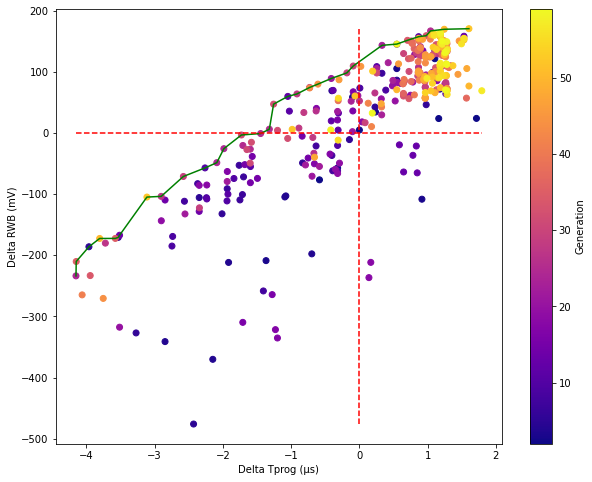

In [8]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

data=data[data['Fitness1']>-1000]
front=front[front['Fitness1']>-1000]
#data['Fitness1']=data['Fitness1']+25*(data["Gen no"]-1)

x=data['Fitness2'].copy()
#y=data['Fitness1'].copy()
y=data['Fitness1'].copy()
z=data["Gen no"]

#front.Fitness1=front.Fitness1+25*(front["Gen no"]-1)


fig, ax = plt.subplots(figsize=(10, 8))
cmap = matplotlib.cm.get_cmap('plasma')
normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
colors = [cmap(normalize(value)) for value in z]

ax.scatter(x, y, color=colors)
ax.plot(front[front["Gen no"] == max(front["Gen no"])].Fitness2,front[front["Gen no"] == max(front["Gen no"])].Fitness1,color='green',label='Front')
ax.plot([0,0],[min(y),max(y)],'r--')
ax.plot([min(x),max(x)],[0,0],'r--')
plt.xlabel('Delta Tprog (µs)')
plt.ylabel('Delta RWB (mV)')

cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
plt.ylabel('Generation')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rf
from xgboost import XGBRegressor

# data=data.sort_values('Fitness1')
X=data.drop(['Fitness1','Fitness2', 'isML','Gen no'],axis=1)

mlp = rf(n_jobs=-1, random_state=42, n_estimators=1000)
#mlp = XGBRegressor(n_estimators=1000, n_jobs=24, random_state=42, objective='reg:squarederror')
xg1 = XGBRegressor(n_estimators=1000, n_jobs=24, random_state=42, objective='reg:squarederror')
xg2 = XGBRegressor(n_estimators=1000, n_jobs=24, random_state=42, objective='reg:squarederror')


Y=-0.75*np.abs(data['Fitness2'])+data['Fitness1']
#Y=data[['Fitness2','Fitness1']]

mlp.fit(X,Y)
xg1.fit(X,data['Fitness2'])
xg2.fit(X,data['Fitness1'])
print(mlp.score(X,Y))
print(xg1.score(X,data['Fitness2']))
print(xg2.score(X,data['Fitness1']))

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.9810838098458541
0.9999925480654469
0.9995561301425558


In [10]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
pd.options.display.max_seq_items = 2000

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF, RationalQuadratic
from sklearn import preprocessing

scaler=preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
y1=data['Fitness1']
y2=data['Fitness2']
print(type(y1))
y_scaled = scaler.fit_transform(np.array(y1).reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.1, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.1, random_state=42)


kernel=ConstantKernel() + RBF()+ WhiteKernel(noise_level=1E-3,noise_level_bounds=(1e-05, .1))
gp= GaussianProcessRegressor(kernel=kernel,optimizer='fmin_l_bfgs_b', random_state=None,n_restarts_optimizer=20,normalize_y=True)
gp.fit(X_train,y_train)
print('fitness 1 gp score:',gp.score(X_test,y_test))

gp2=GaussianProcessRegressor(kernel=kernel,optimizer='fmin_l_bfgs_b', random_state=None,n_restarts_optimizer=40,normalize_y=True)
gp2.fit(X_train2,y_train2)
print('fitness 2 gp score:',gp2.score(X_test2,y_test2))


<class 'pandas.core.series.Series'>
fitness 1 gp score: 0.770290859802351
fitness 2 gp score: 0.9830025829758156


In [11]:
columnlist=[0,1,2,3,4,5,6,7,8]
glist={}
for x in columnlist:
    glist[x]=[y for y in range(X.iloc[:,(x)].min(),X.iloc[:,(x)].max()+1)]
    n=5000
print(glist)    

{0: [-100, -99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 1: [-69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2,

In [12]:
def smoothspline(x,y,jmplamb,sortflag=0,duplicateflag=0,standflag=0):

    if standflag==1:
        jmplamb=jmplamb*(np.std(x))**3

    if sortflag==1 and duplicateflag==0:
        sortidx = x.argsort()
        x =x[sortidx]
        y =y[sortidx]

    if duplicateflag==1:
        data = {'a': x, 'b': y}
        df = pd.DataFrame(data)
        grp = df['b'].groupby(df['a'])
        grpMean = grp.mean()
        x = np.array(grpMean.index)  # unique knots
        y = np.array(grpMean)   # mean value at unique knots
        sig = 1.0/np.array(grp.count()).astype(float)  #diagonal matrix
    else:
        sig=np.ones(len(x), float)

    n=len(y)-1
    lamb = 1.0 / (0.5 * jmplamb + 1.0)
    mu=2*(1-lamb)/3.0/lamb
    h=np.ones(n+1);  r=np.zeros(n+1);
    p = np.zeros(n); q = np.zeros(n)
    f=np.zeros(n+1);  #remove f[0] later
    u=np.zeros(n);v=np.zeros(n);w=np.zeros(n)  #remove u[0]
    a = np.zeros(n);    b = np.zeros(n);    c = np.zeros(n);    d = np.zeros(n)

    for i in range(0,n):
        h[i]=x[i+1]-x[i]
        r[i]=3/h[i]
        f[i]=-(r[i-1]+r[i])   #f0=r[-1]+r[0], -1 actually last number. f0 is used as dummy value. actual not correct
        p[i]=2*(x[i+1]-x[i-1]) #p0 dummy
        q[i]=3*(y[i+1]-y[i])/h[i]-3*(y[i]-y[i-1])/h[i-1]  #q0 dummy   h initialized as 1

    for i in range(0, n):
        u[i]=r[i-1]*r[i-1]*sig[i-1] + f[i]*f[i]*sig[i]+r[i]*r[i]*sig[i+1]  #u0 dummy
        u[i]=mu*u[i]+p[i]
        v[i]=f[i]*r[i]*sig[i]+r[i]*f[i+1]*sig[i+1]  #v0 dummy
        v[i]=mu*v[i]+h[i]
        w[i]=mu*r[i]*r[i+1]*sig[i+1] #w0 reset to 0 later

    w[i]=0
    u=u[1:]; v=v[1:]; w=w[1:];p=p[1:];q=q[1:]  #remove dummy value

    q=quincunx(n,u,v,w,q)

    d[0]=y[0]-mu*r[0]*q[0]*sig[0] # q has 1 shifted from the paper for python code
    # d[1]=y[1]-mu*(f[1]*q[0]+r[1]*q[1])*sig[0]
    d[1] = f[1] * q[0] + r[1] * q[1]
    d[1] = y[1] - mu * d[1] * sig[1]
    a[0]=q[0]/(3.0*h[0])
    b[0]=0
    c[0]=(d[1]-d[0])/h[0]-q[0]*h[0]/3.0
    r[0]=0

    a[1] = (q[1] - q[0]) / (3.0 * h[1])
    b[1] = q[0]
    c[1] = (q[0]) * h[0] + c[0]


    for j in range(2, n):
        a[j]=(q[j]-q[j-1])/(3.0*h[j])
        b[j]=q[j-1]
        c[j]=(q[j-1]+q[j-2])*h[j-1]+c[j-1]
        d[j]=r[j-1]*q[j-2]+f[j]*q[j-1]+r[j]*q[j]
        d[j]=y[j]-mu*d[j]*sig[j]

    return x,d,c,b,a


In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import timeit

sns.set_style(
    style='whitegrid', 
#     rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

def plotgp(a1=1,b1=2):
    start = timeit.default_timer()
    dmap={0:'tprecharge_rd_f_l1_xp_8k',1:'tprecharge_rd_f_l2_xp_8k',2:'tprecharge_rd_f_l3_xp_8k',
       3:'tprecharge_rd_f_l4_xp_8k',4:'tprecharge_rd_f_l5_xp_8k',5:'tprecharge_rd_f_l6_xp_8k',
       6:'tprecharge_rd_f_l7_xp_8k',7:'tsense_abl_f,ev_tsense_abl_f',8:'vpassr_bpn_low_top_read_tlc'}
    a=list(dmap.values()).index(a1)
    b=list(dmap.values()).index(b1)

    N=11
    cmap = plt.get_cmap('jet',N)



    n=100000

    d0={}
    d1={}
    d2={}
    d3={}
    d4={}
    d5={}
    d6={}
    d7={}
    d8={}

    d={0:d0,1:d1,2:d2,3:d3,4:d4,5:d5,6:d6,7:d7,8:d8}

    glist={}
    glist1={}
    columnlist=[0,1,2,3,4,5,6,7,8]
    for x in columnlist:
        glist[x]=[y for y in range(X.iloc[:,(x)].min(),X.iloc[:,(x)].max()+1)]
        glist1[x]=np.linspace(X.iloc[:,(x)].min(),X.iloc[:,(x)].max(),10).astype(int).tolist()
    n=100000
    d_original=pd.DataFrame(np.hstack(((np.random.randint(X.iloc[:,(0)].min(),X.iloc[:,(0)].max()+1,n)).reshape(-1,1),
                                          (np.random.randint(X.iloc[:,(1)].min(),X.iloc[:,(1)].max()+1,n)).reshape(-1,1),
                                          (np.random.randint(X.iloc[:,(2)].min(),X.iloc[:,(2)].max()+1,n)).reshape(-1,1),
                                          (np.random.randint(X.iloc[:,(3)].min(),X.iloc[:,(3)].max()+1,n)).reshape(-1,1),
                                          (np.random.randint(X.iloc[:,(4)].min(),X.iloc[:,(4)].max()+1,n)).reshape(-1,1),
                                          (np.random.randint(X.iloc[:,(5)].min(),X.iloc[:,(5)].max()+1,n)).reshape(-1,1),
                                          (np.random.randint(X.iloc[:,(6)].min(),X.iloc[:,(6)].max()+1,n)).reshape(-1,1),
                                          (np.random.randint(X.iloc[:,(7)].min(),X.iloc[:,(7)].max()+1,n)).reshape(-1,1),
                                          (np.random.randint(X.iloc[:,(8)].min(),X.iloc[:,(8)].max()+1,n)).reshape(-1,1))),
                                columns=['tprecharge_rd_f_l1_xp_8k','tprecharge_rd_f_l2_xp_8k','tprecharge_rd_f_l3_xp_8k',
                                         'tprecharge_rd_f_l4_xp_8k','tprecharge_rd_f_l5_xp_8k','tprecharge_rd_f_l6_xp_8k',
                                         'tprecharge_rd_f_l7_xp_8k','tsense_abl_f,ev_tsense_abl_f','vpassr_bpn_low_top_read_tlc'])
    fig, ax = plt.subplots(1,2,figsize=(16,7))
    ax1=ax[0]
    ax2=ax[1]
    f={}
    for x in glist1[a]:
        f[x]=d_original.copy()
        f[x].iloc[:,a]=x
        d_ori=f[x].copy()
        f[x]['f1 mu'],f[x]['f1 std']=gp.predict(f[x],return_std=True)
        f[x]['f2 mu'],f[x]['f2 std']=gp2.predict(d_ori,return_std=True)

        sns.lineplot(x=f[x][b1], y=f[x]['f1 mu'], ci=None, legend=False,
                     color=cmap(glist1[a].index(x)),label='linefit group{gn}={value}'.format(gn=a+1, value=x), ax=ax1)
        sns.lineplot(x=f[x][b1], y=f[x]['f2 mu'],ci=None,legend=False,color=cmap(glist1[a].index(x)), 
                    label='linefit group{gn}={value}'.format(gn=a+1,value=x), ax=ax2)
    norm = matplotlib.colors.Normalize(vmin=X.iloc[:,(a)].min(),vmax=X.iloc[:,(a)].max())
    sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)    
    sm.set_array([]) 
    plt.colorbar(sm, ticks=np.linspace(X.iloc[:,(a)].min(),X.iloc[:,(a)].max(),N), 
        boundaries=np.arange((X.iloc[:,(a)].min()-1),(X.iloc[:,(a)].max()+1),-(-(X.iloc[:,(a)].max()-X.iloc[:,(a)].min())//10)),
                 label='value of g{gn}'.format(gn=a+1))    
    ax1.set(title='{value} randomly generated points except for g:{gn}'.format(value=n,gn=a1))
    ax2.set(title='{value} randomly generated points except for g:{gn}'.format(value=n,gn=a1))
    stop = timeit.default_timer()
    print('Time: ', stop - start,'sec') 
    
    
# def k(a):
#     return a
# interact(k,a=1)
# for a in d:  #0,1,2,3... 
#     for x in glist[a]:  #-100,40...
#         d[a][x]=pd.DataFrame(np.hstack(((np.random.random_integers(X.iloc[:,(0)].min(),X.iloc[:,(0)].max()+1,n)).reshape(-1,1),
#                                       (np.random.random_integers(X.iloc[:,(1)].min(),X.iloc[:,(1)].max()+1,n)).reshape(-1,1),
#                                       (np.random.random_integers(X.iloc[:,(2)].min(),X.iloc[:,(2)].max()+1,n)).reshape(-1,1),
#                                       (np.random.random_integers(X.iloc[:,(3)].min(),X.iloc[:,(3)].max()+1,n)).reshape(-1,1),
#                                       (np.random.random_integers(X.iloc[:,(4)].min(),X.iloc[:,(4)].max()+1,n)).reshape(-1,1),
#                                       (np.random.random_integers(X.iloc[:,(5)].min(),X.iloc[:,(5)].max()+1,n)).reshape(-1,1),
#                                       (np.random.random_integers(X.iloc[:,(6)].min(),X.iloc[:,(6)].max()+1,n)).reshape(-1,1),
#                                       (np.random.random_integers(X.iloc[:,(7)].min(),X.iloc[:,(7)].max()+1,n)).reshape(-1,1),
#                                       (np.random.random_integers(X.iloc[:,(8)].min(),X.iloc[:,(8)].max()+1,n)).reshape(-1,1))),
#                             columns=['g1','g2','g3','g4','g5','g6','g7','g8','g9'])
#         d[a][x].iloc[:,a]=x
#         d_ori=d[a][x].copy()
#         d[a][x]['f1 mu'],d[a][x]['f1 std']=gp.predict(d[a][x],return_std=True)
#         d[a][x]['f2 mu'],d[a][x]['f2 std']=gp2.predict(d_ori,return_std=True)
interactive_plot = interactive(plotgp,{'manual':True}, a1=['tprecharge_rd_f_l1_xp_8k','tprecharge_rd_f_l2_xp_8k','tprecharge_rd_f_l3_xp_8k',
                                                                    'tprecharge_rd_f_l4_xp_8k','tprecharge_rd_f_l5_xp_8k','tprecharge_rd_f_l6_xp_8k',
                                                                    'tprecharge_rd_f_l7_xp_8k','tsense_abl_f,ev_tsense_abl_f','vpassr_bpn_low_top_read_tlc'], 
                               b1=['tprecharge_rd_f_l1_xp_8k','tprecharge_rd_f_l2_xp_8k','tprecharge_rd_f_l3_xp_8k',
                                                                    'tprecharge_rd_f_l4_xp_8k','tprecharge_rd_f_l5_xp_8k','tprecharge_rd_f_l6_xp_8k',
                                                                    'tprecharge_rd_f_l7_xp_8k','tsense_abl_f,ev_tsense_abl_f','vpassr_bpn_low_top_read_tlc']);
print('please select a(the group thats is to be set as a constant) \nplease select b(the group that is going to be shown on x-axis)')
output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot


please select a(the group thats is to be set as a constant) 
please select b(the group that is going to be shown on x-axis)


interactive(children=(Dropdown(description='a1', options=('tprecharge_rd_f_l1_xp_8k', 'tprecharge_rd_f_l2_xp_8…

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


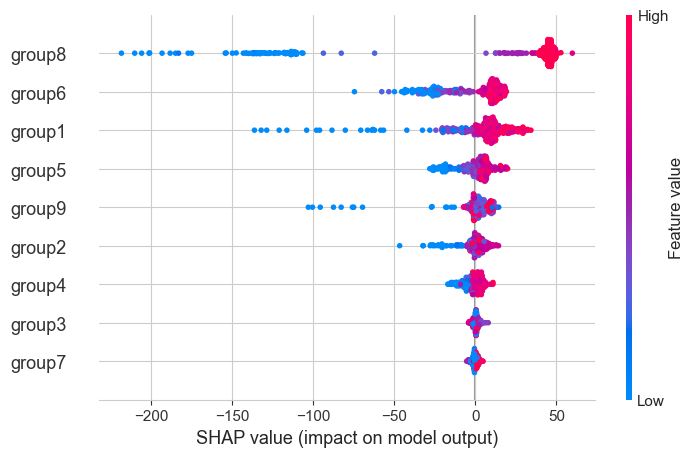

In [14]:
import shap
fig, ax = plt.subplots(figsize=(12, 10))
explainer = shap.TreeExplainer(mlp)
shap_values = shap.TreeExplainer(mlp).shap_values(X)
shap.summary_plot(shap_values, X)

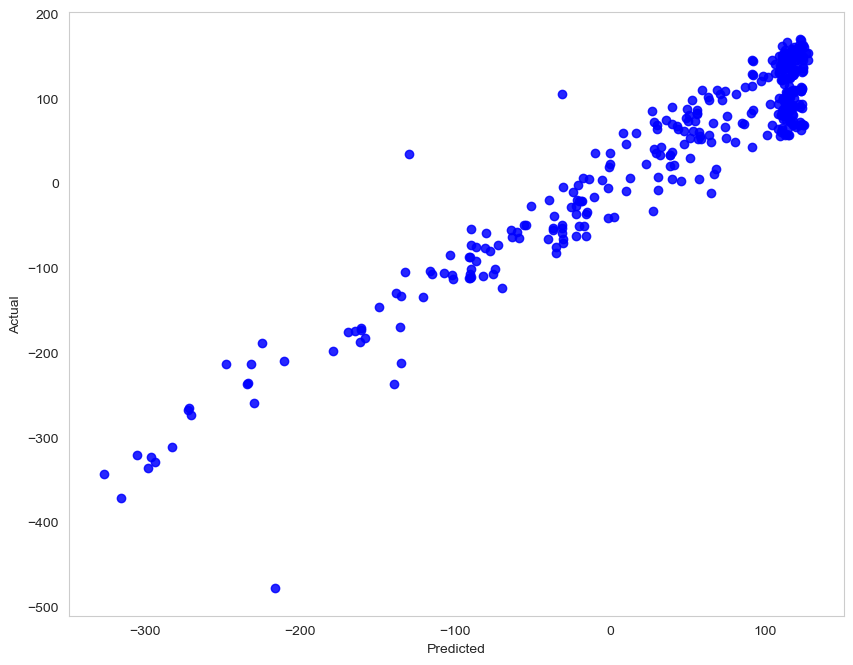

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(gp.predict(X),Y,'o',alpha=0.85,color='blue',label='GA')

plt.xlabel('Predicted')
plt.ylabel('Actual')

ax.grid()

plt.show()

In [16]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values,X)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


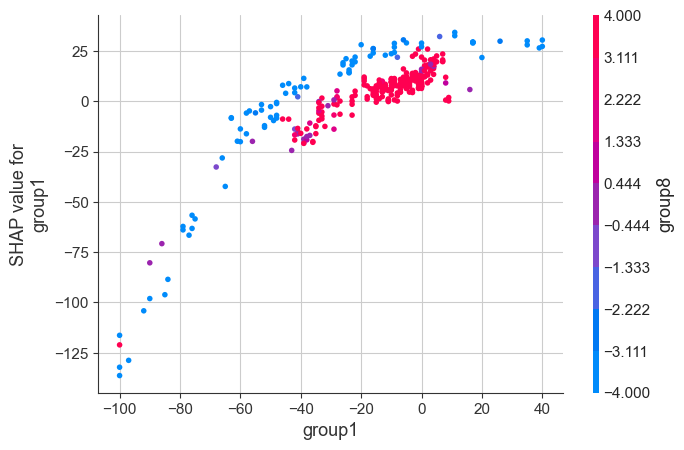

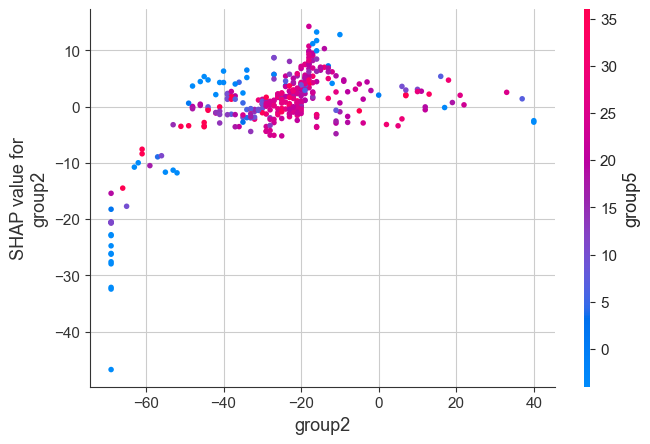

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


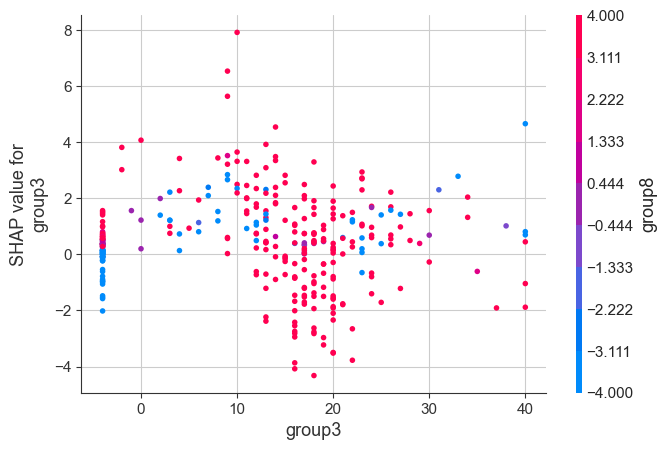

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


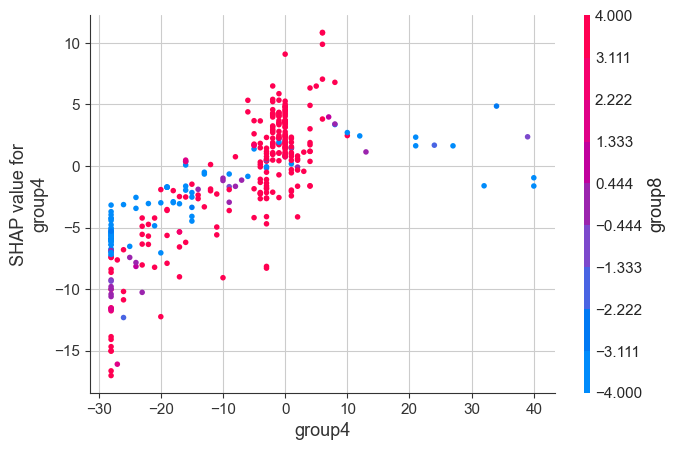

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


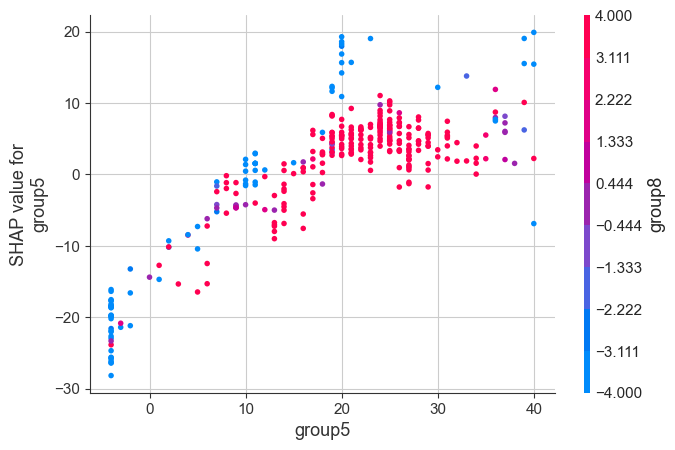

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


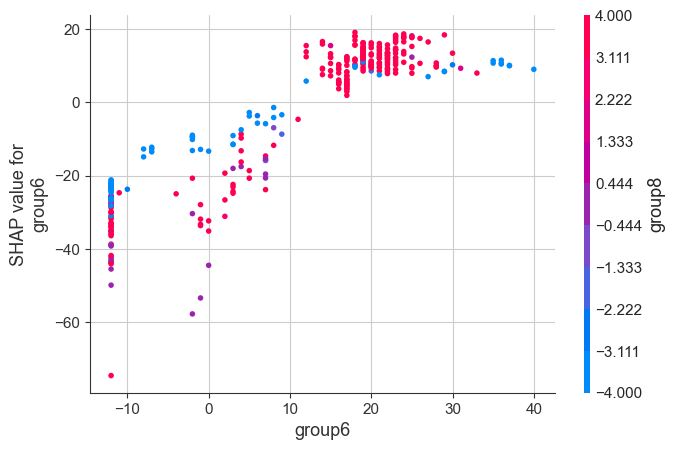

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


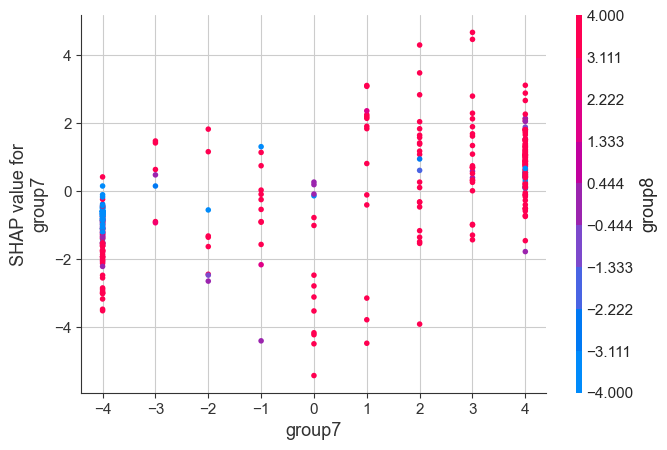

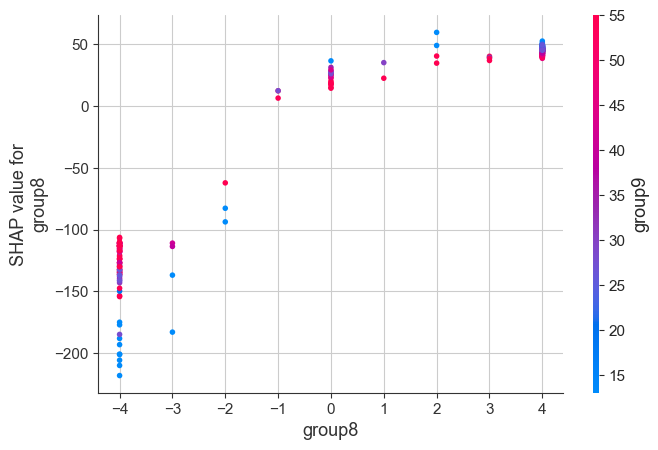

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


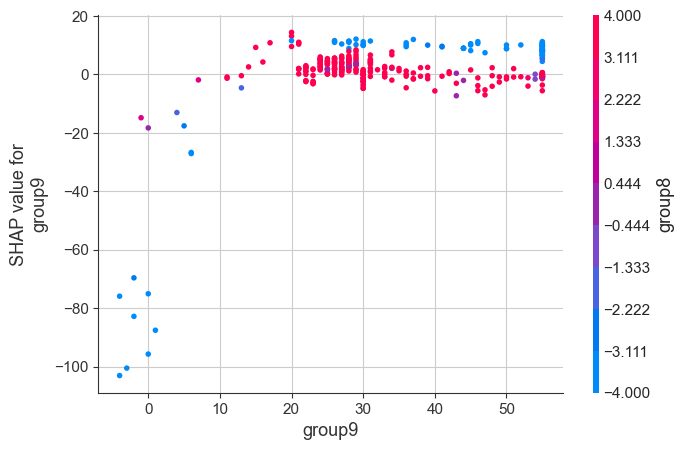

In [17]:
for key in list(X.keys()):
    shap.dependence_plot(key, shap_values, X)

In [18]:
# from ipywidgets import IntSlider
# from ipywidgets.embed import embed_minimal_html

# slider = IntSlider(value=40)
# embed_minimal_html('export.html', views=[slider], title='Widgets export')

In [19]:
# import json

# from ipywidgets import IntSlider
# from ipywidgets.embed import embed_data

# s1 = IntSlider(max=200, value=100)
# s2 = IntSlider(value=40)
# data = embed_data(views=[s1, s2])

# html_template = """
# <html>
#   <head>

#     <title>Widget export</title>

#     <!-- Load RequireJS, used by the IPywidgets for dependency management -->
#     <script 
#       src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" 
#       integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" 
#       crossorigin="anonymous">
#     </script>

#     <!-- Load IPywidgets bundle for embedding. -->
#     <script
#       data-jupyter-widgets-cdn="https://cdn.jsdelivr.net/npm/"
#       src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" 
#       crossorigin="anonymous">
#     </script>

#     <!-- The state of all the widget models on the page -->
#     <script type="application/vnd.jupyter.widget-state+json">
#       {manager_state}
#     </script>
#   </head>

#   <body>

#     <h1>Widget export</h1>

#     <div id="first-slider-widget">
#       <!-- This script tag will be replaced by the view's DOM tree -->
#       <script type="application/vnd.jupyter.widget-view+json">
#         {widget_views[0]}
#       </script>
#     </div>

#     <hrule />

#     <div id="second-slider-widget">
#       <!-- This script tag will be replaced by the view's DOM tree -->
#       <script type="application/vnd.jupyter.widget-view+json">
#         {widget_views[1]}
#       </script>
#     </div>

#   </body>
# </html>
# """

# manager_state = json.dumps(data['manager_state'])
# widget_views = [json.dumps(view) for view in data['view_specs']]
# rendered_template = html_template.format(manager_state=manager_state, widget_views=widget_views)
# with open('export.html', 'w') as fp:
#     fp.write(rendered_template)

In [20]:

# import os

# os.system('jupyter nbconvert --to html gp_v1.ipynb')

In [21]:
import nbinteract as nbi
nbi.publish('yehaoyuan96/yhy/master', 'gp_v1.ipynb',template='full')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'gp_v1.ipynb'.
Converting notebook...



Successfully converted!

<a href="gp_v1.html" target="_blank" download>Click to download your webpage.</a>

To host your webpage, see the documentation:
<a href="https://www.nbinteract.com/tutorial/tutorial_publishing.html"
        target="_blank">
    https://www.nbinteract.com/tutorial/tutorial_publishing.html
</a>
